# **Loan Default Prediction**
By: Kyle W. Bartell 
MIT Candidate for ADSP Certificaiton: July 2025

## **Problem Definition**

**Why solving this problem is important.** 

Banks and financial institutions rely heavily on issuing home loans to drive revenue, primarily through interest payments. However, when borrowers default on their loans, the institution suffers severe financial losses and an increased Non-Performing Assets (NPA) burden. This problem becomes more pronounced when: The volume of loan applicaitons are high. The screening is still semi-manual. At times prone to human error and biases or misjudgment. Can also lead to inefficiencies in identifying risk at the application stage. Addressing this problem is critical becuase, reducing defaluts increas profitability for FI's. ML that predicts defaults early allow banks to avoid bad loan and protect their bottom line. Predictive modeling can streamline credit decisions, reduce time and resource cost and improve efficiency overall in loan processing. 
Banks are highly regulated and must comply with the Equal Credit Opportunity Act. A data-driven process helps justify decsions while reducing discriminatory biases. 

**Additional POV - The Business Problem**
A broader business problem is operational risk and long-term customer profitability. Customer default predictions protects againts finaicial loss, it can also help banks idnetify: High-value, low-risk borrowers for long-term relationships(e.g, cross-selling credit cards, insurance, investment products), Can reduce the cost of manual underwriting by shifting to automataed decision support systems. Prevent reputational risk associated with poor lending pracicies or discriinatory loan approvals. 

### **The objective:**
The core objective will be to build a classification model that predicts whether a loan applicant is likely to default (*target variable: BAD*). This model will focus on past applicant data(features like loan amount, debt-to-income ratio, emplyment info, ect.) Interpretable enough to comply with ECOA and justify why predicitons was made, and overall help the bank make informed lending decisions and potentially automate part of the underwriting process. 

### **The key questions:**
The important questions that must be answered to address the problem effectively and fulfill both the technical and business objectives are: 
Who is likely to default on a loan? (The model will classify applicants as hight or low risk using avaiable features) Target variable: BAD (1=defalut, 0= non-default) What features will influnce the predictive model. Can this model be trusted to make fair, unbiased decsions? How can FI's operationalize this model? What quality or preprocessing issues need to be addressed. 

### **The Problem Formulation**
We are solving a binary classification problem using supervised machine learning. The goal is to predict weather a loan applicant will default using historical application and credit behavior data. Target Variable: Bad [0 or 1], Binary classification. Maching Learning Objective: Minimize false negatives (predicting someone won't default when they actually do). Maintain Model Interpretability (logistic regression, decision tree). Handle class imbalance, if present, using resampling techniues or algorithm level adjustments. Model performance metrics will be applied, recall for BAD =1, Precsion and F1-score. Feature importance using SHAP Python Package (maybe). 

## **Data Description:**
The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property. 

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts) 

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments). 

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due). 

* **CLAGE:** Age of the oldest credit line in months. 

* **NINQ:** Number of recent credit inquiries. 

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## **Import the necessary libraries and Data**

In [11]:
# Data manipulation
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Set seaborn style
sns.set(style='whitegrid')
# Warnings
import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv(r'C:\Users\Kyle\Desktop\Capsont_2025_MIT_ADS\hmeq.csv')

# Display the first few rows of the DataFrame
df.head()


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values

In [13]:
# Shape and basic info
print("Shape of dataset:", df.shape)
df.info()

# Check for missing values
df.isnull().sum()


Shape of dataset: (5960, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [14]:
# Calculate number and percentage of missing values
missing_data = df.isnull().sum().to_frame(name='Missing Count')
missing_data['Missing %'] = (missing_data['Missing Count'] / len(df)) * 100

# Filter only columns with missing values
missing_data = missing_data[missing_data['Missing Count'] > 0]

# Sort by % of missing values (descending)
missing_data = missing_data.sort_values(by='Missing %', ascending=False)

# Display
missing_data


,Missing Count,Missing %
DEBTINC,1267,21.258389
DEROG,708,11.879195
DELINQ,580,9.731544
MORTDUE,518,8.691275
YOJ,515,8.640940
NINQ,510,8.557047
CLAGE,308,5.167785
JOB,279,4.681208
REASON,252,4.228188
CLNO,222,3.724832


In [10]:
# Check for duplicate rows in the dataframe
duplicate_rows = df.duplicated()
print(f"Number of duplicate rows: {duplicate_rows.sum()}")

# Optionally, display the duplicate rows
df[duplicate_rows]

Number of duplicate rows: 0


,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC


**Initial Observation**
We have 5,960 applicants, 13 columns with target feature BAD + 12 other features. 11 of the 14 columns have missing values and most effected feature is DEBTINC (Debt-to-Income Ratio) with 21% missing values.11% DEROG, 9% DELINQ, 8% MORTDUE, and less than 7% in the following categories. These patterns suggest that targeted inputation strategies can be applied for most variables, while careful consideration is needed for handling DEBIT-to-Income Ratio due to its realiively high missing rate. 

## Summary Statistics

In [ ]:
# Summary statistics for Numerical features
df.describe().T


,count,mean,std,min,25%,50%,75%,max
BAD,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000


- Observations from Summary Statistics

About 20% of applicants defaulted, indicating class imbalance, will affect model training. May need to use class weights or resampling. LOAN average is around $18.5, with Min of $1.1k to $90k. Potential skewed when visualized, will consider log-transformatoin. The average existing mortgage is $73k, with max value at $399k. This suggest some applicants may have high outstanding debt burdens. VALUE: Property values vary ranging from $8k min, to $855K max indicating a broad socioeconomic range among applicants. YOJ (Years on Job) The median is 8 years, but ranges from 0 - 41 which is a high variance. DEROG and DELINQ, median is 0 for both max values for both show outlier risk. CLAGE (Age of the oldest credit line in months) average age 180 months (15 years) up to 1168 month, indicating another outlier. Going to examine visually possibly cap or transform. 

## **Exploratory Data Analysis (EDA) and Visualization**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What is the range of values for the loan amount variable "LOAN"?
2. How does the distribution of years at present job "YOJ" vary across the dataset?
3. How many unique categories are there in the REASON variable?
4. What is the most common category in the JOB variable?
5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?
6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?
7. Is there a correlation between the value of the property and the loan default rate?
8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?

### **Univariate Analysis**


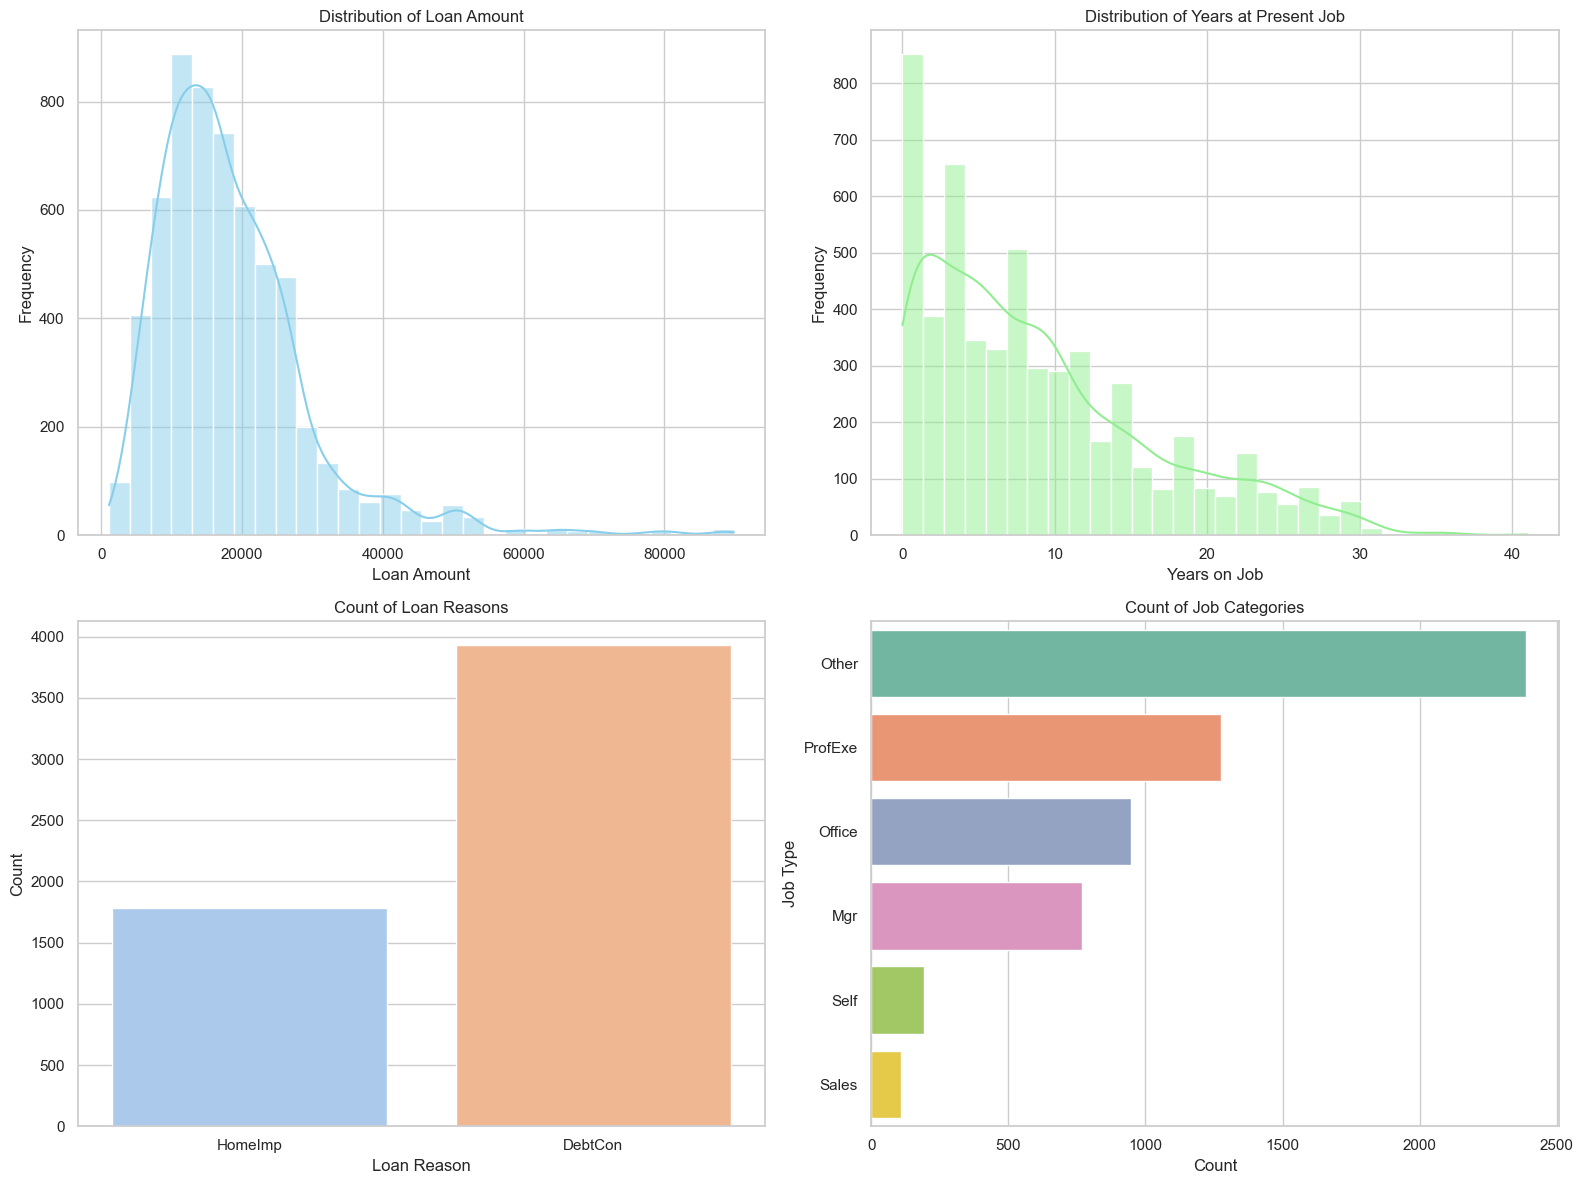

In [16]:
# Univariate Analysis - Visualizations
plt.figure(figsize=(16, 12))

# Plot 1: Distribution of Loan Amount
plt.subplot(2, 2, 1)
sns.histplot(df['LOAN'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')

# Plot 2: Distribution of Years at Present Job (YOJ)
plt.subplot(2, 2, 2)
sns.histplot(df['YOJ'].dropna(), kde=True, bins=30, color='lightgreen')
plt.title('Distribution of Years at Present Job')
plt.xlabel('Years on Job')
plt.ylabel('Frequency')

# Plot 3: Countplot of REASON
plt.subplot(2, 2, 3)
sns.countplot(x='REASON', data=df, palette='pastel')
plt.title('Count of Loan Reasons')
plt.xlabel('Loan Reason')
plt.ylabel('Count')

# Plot 4: Countplot of JOB
plt.subplot(2, 2, 4)
sns.countplot(y='JOB', data=df, order=df['JOB'].value_counts().index, palette='Set2')
plt.title('Count of Job Categories')
plt.xlabel('Count')
plt.ylabel('Job Type')

# Show all plots
plt.tight_layout()
plt.show()


**Insight from the above Univariate Analysis Vizual Plots**

Loan Amount: Distribution is rightly skewed. Most loans are clustered between $10K-$30K, with some extreme values near $90K. 

Year on JOB: Heavily skewed toward lower values. Many applicants have less than 5 years at their current job.

Loan Reason: Two categories for this analysis and that's Home Improvement and Debt Consolidation with the latter dominating the bar chart for reason for loan. Debt consolidation seems to be the more common reason for loans. 
 
Lastly, Job Type: The most frequent job category is "Other" followed by Professional/Executive and Office. Less common roles include Sales and Self-employed. 

### **Bivariate Analysis**

Text(0.5, 1.0, 'Loan Amount by Default Status')

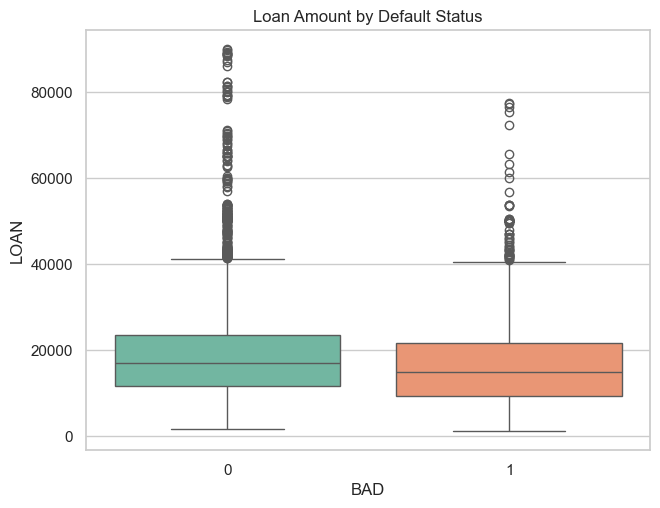

In [ ]:
# 1. BIVARIATE ANALYSIS VISUALS
plt.figure(figsize=(16, 12))

# Plot 1: Loan amount vs. BAD
plt.subplot(2, 2, 1)
sns.boxplot(x='BAD', y='LOAN', data=df, palette='Set2')
plt.title('Loan Amount by Default Status')

There appears to be a statistically meaningful difference in loan amounts between those who defaulted and those who didn’t. The difference suggest smaller loans are more associated with default, potentially due to:

Riskier borrower profiles receiving smaller loan approvals

Lower-income applicants needing less, but being less stable. 

Business Takeaway:
Loan amount (LOAN) is a useful predictor.

It may indirectly reflect borrower financial capacity or creditworthiness.

Should be retained as a core feature in any credit risk model.

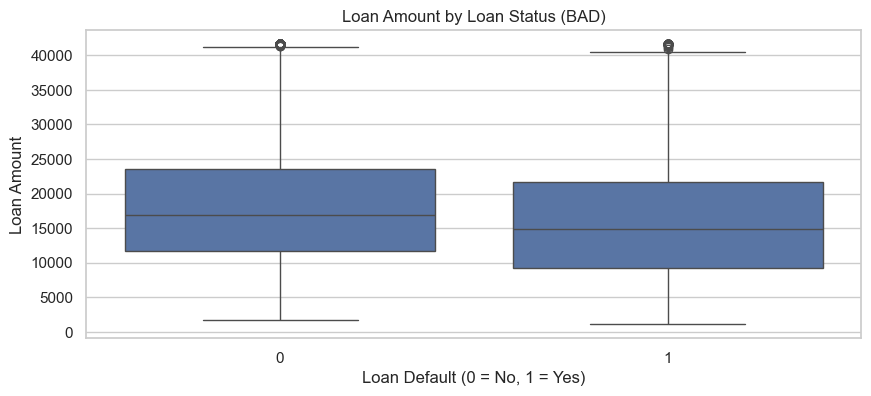

LOAN T-test: t-stat=-6.20, p-value=0.0000


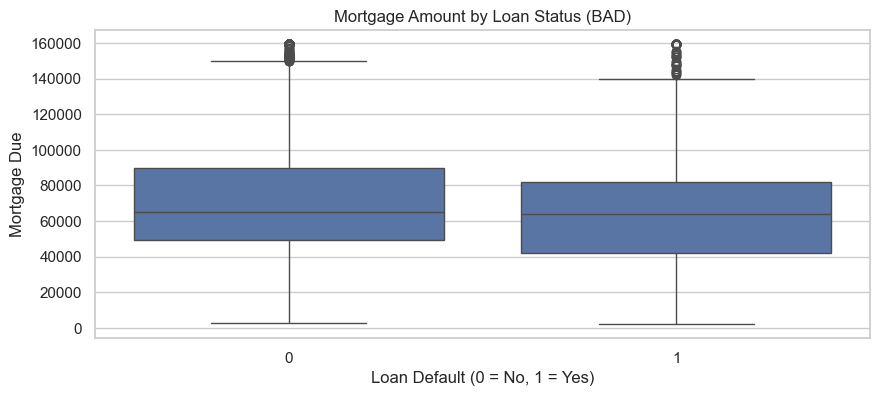

MORTDUE T-test: t-stat=-4.51, p-value=0.0000


In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Boxplot for LOAN
plt.figure(figsize=(10, 4))
sns.boxplot(data=df_encoded, x='BAD', y='LOAN')
plt.title("Loan Amount by Loan Status (BAD)")
plt.xlabel("Loan Default (0 = No, 1 = Yes)")
plt.ylabel("Loan Amount")
plt.show()

# Statistical Test for LOAN
loan_default = df_encoded[df_encoded['BAD'] == 1]['LOAN']
loan_repaid = df_encoded[df_encoded['BAD'] == 0]['LOAN']
t_stat_loan, p_val_loan = ttest_ind(loan_default, loan_repaid, equal_var=False)
print(f"LOAN T-test: t-stat={t_stat_loan:.2f}, p-value={p_val_loan:.4f}")

# Boxplot for MORTDUE
plt.figure(figsize=(10, 4))
sns.boxplot(data=df_encoded, x='BAD', y='MORTDUE')
plt.title("Mortgage Amount by Loan Status (BAD)")
plt.xlabel("Loan Default (0 = No, 1 = Yes)")
plt.ylabel("Mortgage Due")
plt.show()

# Statistical Test for MORTDUE
mort_default = df_encoded[df_encoded['BAD'] == 1]['MORTDUE']
mort_repaid = df_encoded[df_encoded['BAD'] == 0]['MORTDUE']
t_stat_mort, p_val_mort = ttest_ind(mort_default, mort_repaid, equal_var=False)
print(f"MORTDUE T-test: t-stat={t_stat_mort:.2f}, p-value={p_val_mort:.4f}")


Loan amount (LOAN): Shows a statistically meaningful difference - this will be included as a key feature.

Mortgage due (MORTDUE): Likely not a strong predictor alone, but may add value when combined with others (e.g., income, property value).

Text(0.5, 1.0, 'Mortgage Due by Default Status')

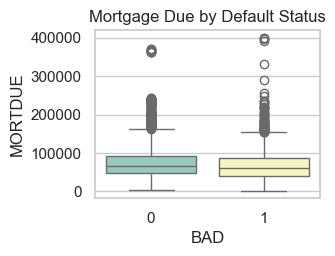

In [18]:
# Plot 2: Mortgage due vs. BAD
plt.subplot(2, 2, 2)
sns.boxplot(x='BAD', y='MORTDUE', data=df, palette='Set3')
plt.title('Mortgage Due by Default Status')

Mortgage amount (MORTDUE) alone does not show a strong differentiating pattern between those who defaulted and those who repaid.

### **Multivariate Analysis**

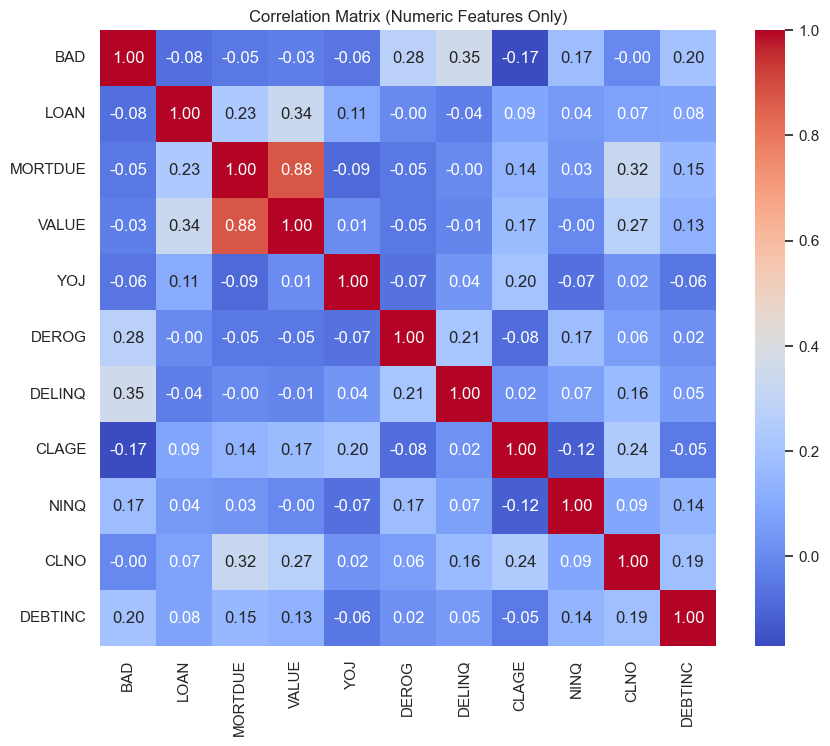

In [22]:
# 2. MULTIVARIATE ANALYSIS - Correlation Heatmap (fixed)
plt.figure(figsize=(10, 8))

# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['number'])

# Compute correlation matrix
corr = numeric_df.corr()

# Plot heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix (Numeric Features Only)')
plt.show()


## Treating Outliers

In [24]:
# 3. OUTLIER TREATMENT - Capping numeric features using IQR
def cap_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return series.clip(lower, upper)

# Apply to selected numeric columns
for col in ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']:
    df[col] = cap_outliers(df[col])

## Treating Missing Values

In [ ]:
# 4. MISSING VALUE IMPUTATION

# Numerical: fill with median
num_cols = ['MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())


In [25]:
# Categorical: fill with mode or new label
df['REASON'] = df['REASON'].fillna('Unknown')
df['JOB'] = df['JOB'].fillna(df['JOB'].mode()[0])  # or df['JOB'].fillna('Other')

# Final check
missing_after = df.isnull().sum()
print("Missing values after imputation:\n", missing_after[missing_after > 0])

Missing values after imputation:
 MORTDUE     518
VALUE       112
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64


In [26]:
# Encode categorical variables: One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['REASON', 'JOB'], drop_first=True)

# Preview the encoded DataFrame structure
df_encoded.head()


,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,REASON_Unknown,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,NaN,True,False,False,True,False,False,False
1,1,1300,70053.0,68400.0,7.0,0.0,0.0,121.833333,0.0,14.0,NaN,True,False,False,True,False,False,False
2,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,NaN,True,False,False,True,False,False,False
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,True,False,False,False
4,0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,NaN,True,False,True,False,False,False,False


## **Important Insights from EDA**

Features most correlated with default (BAD). DELINQ 0.35, number of delinquent credit lines has the strongest positive correlation with default. More delinquencies higher default risk. 

DEROG: (0.28) Major deragatory credit events also show a notable positive correlation with BAD. 

DEBTINC (0.20): Higher debt-to-income ratios are also linked to higher default rates.

NINQ and CLAGE (~0.17 and -0.17): More recent inquiries = higher risk; older credit history = slightly lower risk.
DELINQ, DEROG, and DEBTINC are key indicators of credit behavior and should be prioritized in model training.

**Strong internal feature correlations**
MORTDUE and VALUE (0.88): Strongest correlation in the dataset. Likely because the mortgage due is naturally tied to the property’s value.

LOAN and VALUE (0.34), LOAN and MORTDUE (0.23): Indicates moderate multicollinearity — you might choose only one for modeling or use dimensionality reduction (PCA) if needed.

Will keep attentive to multicollinearity whenusing VALUE, MORTDUE, and LOAN together. could potentially impact model stability in linear models. 

**Low or no correlation**
JOB, REASON (not in this plot because they are categorical) would require encoding to evaluate.

CLNO, YOJ, VALUE show low correlation with BAD — they may still be useful in combination with other features or non-linear models (like Random Forest).

 Interpretation: Don't discard immediately — test their contribution during modeling.

For logistic regression, will prioritize: DELINQ, DEROG, DEBITINC and possibly NINQ and CLAGE. 

Use others like VALUE/MORTDUE carefully due to potential multicollinearity.



## **Model Building - Approach**
- Data preparation
- Partition the data into train and test set
- Build the model
- Fit on the train data
- Tune the model
- Test the model on test set

In [27]:
# Convert all boolean columns to integers (0/1)
df_encoded = df_encoded.astype({col: 'int' for col in df_encoded.select_dtypes('bool').columns})


In [28]:
# Final structure check
print(df_encoded.info())

# Quick look at target class balance
print(df_encoded['BAD'].value_counts(normalize=True))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BAD             5960 non-null   int64  
 1   LOAN            5960 non-null   int64  
 2   MORTDUE         5442 non-null   float64
 3   VALUE           5848 non-null   float64
 4   YOJ             5445 non-null   float64
 5   DEROG           5252 non-null   float64
 6   DELINQ          5380 non-null   float64
 7   CLAGE           5652 non-null   float64
 8   NINQ            5450 non-null   float64
 9   CLNO            5738 non-null   float64
 10  DEBTINC         4693 non-null   float64
 11  REASON_HomeImp  5960 non-null   int64  
 12  REASON_Unknown  5960 non-null   int64  
 13  JOB_Office      5960 non-null   int64  
 14  JOB_Other       5960 non-null   int64  
 15  JOB_ProfExe     5960 non-null   int64  
 16  JOB_Sales       5960 non-null   int64  
 17  JOB_Self        5960 non-null   i

In [29]:
# Impute all numeric columns with median
num_cols = df_encoded.select_dtypes(include=['float64']).columns

for col in num_cols:
    df_encoded[col] = df_encoded[col].fillna(df_encoded[col].median())


In [30]:
# Impute categorical variables
df['REASON'] = df['REASON'].fillna('Unknown')
df['JOB'] = df['JOB'].fillna(df['JOB'].mode()[0])  # or 'Other'


In [31]:
# Final structure check
print(df_encoded.info())

# Quick look at target class balance
print(df_encoded['BAD'].value_counts(normalize=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BAD             5960 non-null   int64  
 1   LOAN            5960 non-null   int64  
 2   MORTDUE         5960 non-null   float64
 3   VALUE           5960 non-null   float64
 4   YOJ             5960 non-null   float64
 5   DEROG           5960 non-null   float64
 6   DELINQ          5960 non-null   float64
 7   CLAGE           5960 non-null   float64
 8   NINQ            5960 non-null   float64
 9   CLNO            5960 non-null   float64
 10  DEBTINC         5960 non-null   float64
 11  REASON_HomeImp  5960 non-null   int64  
 12  REASON_Unknown  5960 non-null   int64  
 13  JOB_Office      5960 non-null   int64  
 14  JOB_Other       5960 non-null   int64  
 15  JOB_ProfExe     5960 non-null   int64  
 16  JOB_Sales       5960 non-null   int64  
 17  JOB_Self        5960 non-null   i

**Final Dataset Check,** 

You'll see in the above print out of the data frame, there are no missing values, all features are numeric (int64 or float64) and Categorical variables encoded via One-Hot. Target variable BAD still shows ~20% defaults → moderate class imbalance We're fully ready for model building!

### Logistic Regression

In [32]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Define features and target
X = df_encoded.drop('BAD', axis=1)
y = df_encoded['BAD']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Initialize and train logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)
y_prob = logreg.predict_proba(X_test)[:, 1]

# Evaluate model
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print results
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)
print("ROC-AUC Score:", roc_auc)


Confusion Matrix:
 [[1401   30]
 [ 316   41]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.98      0.89      1431
           1       0.58      0.11      0.19       357

    accuracy                           0.81      1788
   macro avg       0.70      0.55      0.54      1788
weighted avg       0.77      0.81      0.75      1788

ROC-AUC Score: 0.6752579438483988


### Model Performance Summary - Logistic Regression

Confusion Matrix showcases True Negatives (TN): 1401 non-defaulters correctly classified,False Positives (FP): 30 non-defaulters incorrectly predicted as defaulters. False Negatives (FN) of defaulters incorrectly predicted as non-defaulters with 316. True Positives (TP): 41 actual defaulters correctly identified. 
Model likely prioritizes oveall accuracy, which is misleading in imbalanced scenarios. 

False Positives (FP): 30 non-defaulters incorrectly predicted as defaulters

Overall accuracy 81% which seems solid at first glance but class imbalance is revealed. The model is good at identifying non-defaulters, but misses most defaulters (recall = 11%). Typical when dealing with imbalanced dataset, only 20% are defaulters. ROC_AUC Score is .67 indicating the model is moderatly better than random guessing, but there's room for improvement. 

Will look significantly improving default detection by trying class weighting. This will tell the model to penalize misclassificaitons of the minority class more heavily. 

**Class Weighting**

In [33]:
logreg = LogisticRegression(max_iter=1000, class_weight='balanced')


In [34]:

y_pred_custom = (y_prob >= 0.3).astype(int)


### Decision Tree

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

X = df_encoded.drop('BAD', axis=1)
y = df_encoded['BAD']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Initialize and train Decision Tree model
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Make predictions
y_pred = dtree.predict(X_test)
y_prob = dtree.predict_proba(X_test)[:, 1]

# Evaluate model
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print results
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)
print("ROC-AUC Score:", roc_auc)

Confusion Matrix:
 [[1282  149]
 [ 149  208]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      1431
           1       0.58      0.58      0.58       357

    accuracy                           0.83      1788
   macro avg       0.74      0.74      0.74      1788
weighted avg       0.83      0.83      0.83      1788

ROC-AUC Score: 0.7392550311529225


This model performed much better at catching defaulters than logistic regression with: 

Far higher recall(58% vs 11%)
No sacrafice in ovearl accuracy. 

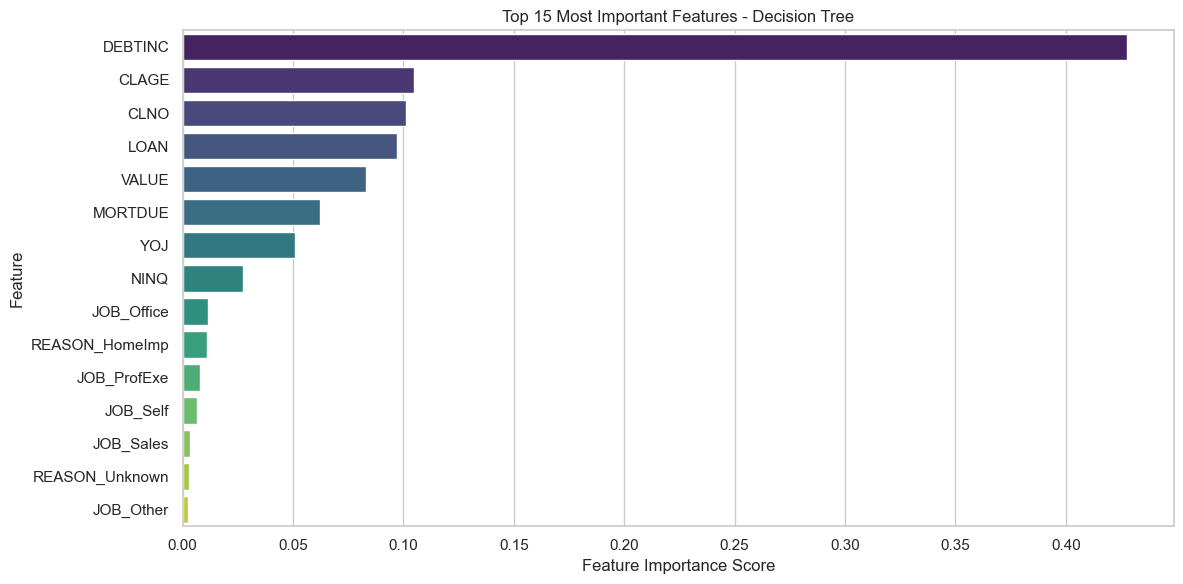

In [36]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame with feature names and their importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dtree.feature_importances_
})

# Sort features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15), palette='viridis')
plt.title('Top 15 Most Important Features - Decision Tree')
plt.xlabel('Feature Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


**Top Prediction of Loan Default**

1) DEBTINC (Debt-to-Income Ratio) – by far the most important predictor

     Applicants with high debt relative to income are more likely to default.

2) CLAGE (Credit Line Age) – older credit lines may indicate more credit history, reducing risk.

3) CLNO (Number of Credit Lines) – too many or too few lines could reflect credit mismanagement.

4) LOAN, VALUE, MORTDUE – core financial terms related to the amount borrowed and collateral.

5) YOJ (Years on Job) – longer job tenure often reflects stability.

6) NINQ (New Credit Inquiries) – high values could be a red flag for recent financial stress.



### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.** 
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth** 

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them. 

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction. 

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [37]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

#  Define features and target
X = df_encoded.drop('BAD', axis=1)
y = df_encoded['BAD']

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Step 7: Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 8: Make predictions
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Step 9: Evaluate model
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Step 10: Output results
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)
print("ROC-AUC Score:", roc_auc)


Confusion Matrix:
 [[1377   54]
 [ 134  223]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94      1431
           1       0.81      0.62      0.70       357

    accuracy                           0.89      1788
   macro avg       0.86      0.79      0.82      1788
weighted avg       0.89      0.89      0.89      1788

ROC-AUC Score: 0.9509784347002254


**Confusion Maxtrix for Random Forest Model**

True Negatives (TN): 1377 — correctly identified non-defaulters

False Positives (FP): 54 — non-defaulters misclassified as defaulters

False Negatives (FN): 134 — defaulters missed

True Positives (TP): 223 — defaulters correctly identified 

**Performance Metric: 95%**, indicating excellent discrimination between classes. 
**Marco F1 Score: 82%**, Strong balance across both classes. 

The model performs very well overall, with excellent accuracy and ROC-AUC.

It shows a huge improvement in recall for defaulters (62%) compared to logistic regression (11%) — critical for this problem.

Only a small increase in false positives, which is acceptable when the cost of missing defaulters is high.


### **Random Forest Classifier Hyperparameter Tuning**

In [39]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


# Split into features and target
X = df_encoded.drop('BAD', axis=1)
y = df_encoded['BAD']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Best estimator
best_rf = grid_search.best_estimator_

# Predict and evaluate
y_pred = best_rf.predict(X_test)
y_prob = best_rf.predict_proba(X_test)[:, 1]

print("Best Parameters:\n", grid_search.best_params_)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters:
 {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Confusion Matrix:
 [[1374   57]
 [ 130  227]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.94      1431
           1       0.80      0.64      0.71       357

    accuracy                           0.90      1788
   macro avg       0.86      0.80      0.82      1788
weighted avg       0.89      0.90      0.89      1788

ROC-AUC Score: 0.9537051717961816


**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):** 
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

In [43]:
# Step 1: Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Step 2: Define evaluation function
def evaluate_model(model, name, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    return {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Recall (BAD=1)": recall_score(y_test, y_pred),
        "F1 Score (BAD=1)": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    }

# Step 3: Initialize models
models = [
    (LogisticRegression(max_iter=1000), "Logistic Regression"),
    (DecisionTreeClassifier(random_state=42), "Decision Tree"),
    (RandomForestClassifier(random_state=42), "Random Forest"),
    (best_rf, "Tuned Random Forest")  # Use the model from your GridSearchCV
]

# Step 4: Evaluate all models
results = [evaluate_model(m, name, X_train, X_test, y_train, y_test) for m, name in models]

# Step 5: Create DataFrame and display
comparison_df = pd.DataFrame(results).sort_values(by="ROC-AUC", ascending=False)
print(comparison_df)


                 Model  Accuracy  Recall (BAD=1)  F1 Score (BAD=1)   ROC-AUC
3  Tuned Random Forest  0.895414        0.635854          0.708268  0.953705
2        Random Forest  0.894855        0.624650          0.703470  0.950978
1        Decision Tree  0.833333        0.582633          0.582633  0.739255
0  Logistic Regression  0.806488        0.114846          0.191589  0.675258


The above Model Comparison Table demonstates how Random Forest with Hyperparameter Tuning outperforms all others in:

Recall for defaulters (64%) — key metric in financial risk

ROC-AUC Score (0.954) — excellent separation between defaulters and non-defaulters

Balanced F1-score and overall accuracy

**This model best balances correctly flagging defaulters without sacrificing accuracy on reliable customers.**

**Scope to Improve Performance**
**Boosting** models ofter outperform Random Forest and support early stopping. They also handle imbalance beter with built-in weighting. 
**SMOTE** Synthetic Minority Oversampling Technique or class weights to improve recall for defaulters. 
**Feature Engineerig** We could create new features. Transform skewed variables. 
**Esemble Technique** Blend predictions from moltiple models. 

**2. Refined insights:** 
**Class Imbalance is a Real Risk**
Only ~20% of applicants defaulted, highlighting the imbalance. Simple models like logistic regression underperform in recall (11%), showing they struggle to detect defaulters. Without proper techniques, models will favor predicting non-defaults, missing risky applicants.
**Ensemble Models Perform Significantly Better** Random Forest with hyperparameter tuning achieved:**90%** accuracy. **64%** recall on defaulters and ROC-AUC of **0.954**

It strikes a strong balance between minimizing false positives (rejecting good applicants) and catching defaulters early.

**3. Proposal for the final solution design:** 

The Tuned Random Forest model is the best choice based on a combination of business needs, performance metrics, and model behavior in imbalanced data settings.Making it the most practical and effective solution to adopt for loan default prediction. 

Performance Highlights
Metric	Score
Accuracy	90%
Recall (BAD=1)	64%
F1 Score (BAD=1)	0.71
ROC-AUC	0.954 

**Business Rationale**
Strong Recall on Defaulters (BAD = 1):

This model correctly identifies a majority of likely defaulters.

That’s critical to prevent financial losses by flagging high-risk applicants before approval.

**Balanced Performance**:
Maintains high precision and accuracy while significantly improving recall.

Unlike Logistic Regression (which misses 89% of defaulters), Random Forest catches a meaningful portion of risky applicants.
**Interpretable & Actionable**
Feature importances and SHAP values allow business teams to understand what drives risk.

Enables data-driven policy and underwriting decisions.
**Robust to Outliers & Non-Linearity**

Captures complex, non-linear relationships (e.g., high loan but low income) that simpler models miss.

Handles missing and skewed data better than linear models.

**My recommendation would be to proceed with peloyment and monitor reacll + drift over time. It's a well-balances, risk-aware model that performs far better than a baive baseline and supports explainable decisioning.** - Kyle W. Bartell 